#  Programming Assignment 2
* Author: Shreya Dubey 

In [37]:
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import math

'''load your data here'''

class LoadDataModule(object):
    def __init__(self):
        self.DIR = './'
        pass
    
    # Returns images and labels corresponding for training and testing. Default mode is train. 
    # For retrieving test data pass mode as 'test' in function call.
    def load(self, mode = 'train'):
        label_filename = mode + '_labels'
        image_filename = mode + '_images'
        label_zip = self.DIR + label_filename + '.zip'
        image_zip = self.DIR + image_filename + '.zip'
        with ZipFile(label_zip, 'r') as lblzip:
            labels = np.frombuffer(lblzip.read(label_filename), dtype=np.uint8, offset=8)
        with ZipFile(image_zip, 'r') as imgzip:
            images = np.frombuffer(imgzip.read(image_filename), dtype=np.uint8, offset=16).reshape(len(labels), 784)
        return images, labels

ld = LoadDataModule()

#Now let's load the dataset
images,labels = ld.load('train')

In [2]:
# Importing all the required libraries

import numpy as np
import sklearn
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [5]:
# normalizing the data

scaler = MinMaxScaler()
images = scaler.fit_transform(images)

C:\Users\khare\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# Changing labels into vector

train_label = np.zeros((images.shape[0],10))
for i in range(len(labels)):
    train_label[i,labels[i]] = 1
    

In [8]:
# creating the model

model = Sequential()
model.add(Dense(output_dim=784, input_dim=784, activation='tanh'))
model.add(Dense(output_dim=512, activation='sigmoid'))
model.add(Dense(output_dim=100, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="tanh", units=784)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=512)`
  after removing the cwd from sys.path.
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
  """
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


In [9]:
# Creating class for wall time 

import time
import keras
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [10]:
# training the model on training data

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

time_callback = TimeHistory()

history = model.fit(images,train_label, epochs=50, batch_size=200, callbacks=[time_callback])

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.5362 - acc: 0.8061
Epoch 2/50
60000/60000 [==============================] - 11s 187us/step - loss: 0.3814 - acc: 0.86040s - loss: 0.3811 - ac
Epoch 3/50
60000/60000 [==============================] - 10s 166us/step - loss: 0.3489 - acc: 0.8719
Epoch 4/50
60000/60000 [==============================] - 10s 167us/step - loss: 0.3189 - acc: 0.8819
Epoch 5/50
60000/60000 [==============================] - 10s 163us/step - loss: 0.3017 - acc: 0.8883
Epoch 6/50
60000/60000 [==============================] - 10s 163us/step - loss: 0.2836 - acc: 0.8940
Epoch 7/50
60000/60000 [==============================] - 10s 164us/step - loss: 0.2728 - acc: 0.8978
Epoch 8/50
60000/60000 [==============================] - 10s 163us/step - loss: 0.2577 - acc: 0.9028
Epoch 9/50
60000/60000 [==============================] - 9s 155us/step - loss: 0.2466 - acc: 0.9085
Epoch 10/50
6

In [11]:
# Rounding up wall time for graph

time = time_callback.times
wall_time = []
sum = 0
for t in range(len(time)):
    sum = sum+time[t]
    wall_time.append(round(sum))

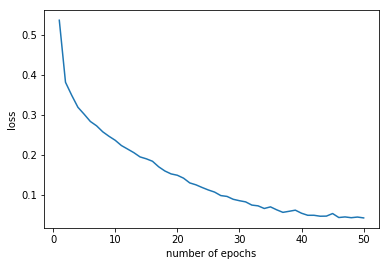

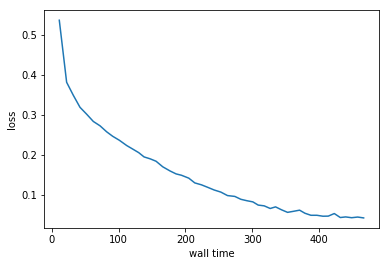

In [12]:
# Plotting graph between loss and epoch 

import matplotlib.pyplot as plt
epoch = np.arange(len(time))
epoch = epoch+1
plt.plot(epoch, history.history['loss'])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.show()

# Plotting graph between loss and wall time

plt.plot(wall_time, history.history['loss'])
plt.ylabel("loss")
plt.xlabel("wall time")
plt.show()

In [30]:
# Prediction on training data

train_Y_pred = model.predict_classes(images)

# Calculating overall accuracy

print("Accuracy = ",metrics.accuracy_score(labels,train_Y_pred)*100)

Accuracy =  98.35666666666667


In [31]:
# Calculating classwise Precision, Recall and F1 score

print("Precision = ",metrics.precision_score(labels,train_Y_pred,average=None)*100)
print("Recall = ",metrics.recall_score(labels,train_Y_pred,average=None)*100)
print("F1 score = ",metrics.f1_score(labels,train_Y_pred,average=None)*100)

Precision =  [ 98.75734677  99.83355526  98.47341338  98.92019571  95.32877604
  98.63509291  95.32497149  98.48585691 100.          99.98308239]
Recall =  [98.01666667 99.96666667 95.68333333 97.71666667 97.61666667 99.96666667
 97.53333333 98.65       99.91666667 98.5       ]
F1 score =  [98.38561271 99.90006662 97.05832629 98.31474805 96.45915679 99.29641586
 96.41650877 98.56786012 99.95831596 99.23600034]


In [34]:
# Calculation of confusion matrix

cm1 = metrics.confusion_matrix(labels,train_Y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
print("Confusion Matrix = ",cm1)

# Calculating classwise accuracies

cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
print("Classwise accuracy = ",(cm1.diagonal()*100))

Confusion Matrix =  [[5881    0    1    0    1    1  116    0    0    0]
 [   0 5998    0    2    0    0    0    0    0    0]
 [  12    0 5741    4  197    0   46    0    0    0]
 [  33   10    1 5863   29    0   64    0    0    0]
 [   1    0   32   51 5857    0   59    0    0    0]
 [   0    0    0    0    0 5998    0    2    0    0]
 [  28    0   55    7   58    0 5852    0    0    0]
 [   0    0    0    0    0   80    0 5919    0    1]
 [   0    0    0    0    2    1    2    0 5995    0]
 [   0    0    0    0    0    1    0   89    0 5910]]
Classwise accuracy =  [98.01666667 99.96666667 95.68333333 97.71666667 97.61666667 99.96666667
 97.53333333 98.65       99.91666667 98.5       ]


In [23]:
# Loading test data

test_images,test_labels = ld.load('test')

In [24]:
# Normalizing test data

test_images = scaler.transform(test_images)

In [35]:
# Prediction on test data

test_Y_pred = model.predict_classes(test_images)

# Calculating overall accuracy

print("Accuracy = ",metrics.accuracy_score(test_labels,test_Y_pred)*100)

Accuracy =  89.01


In [33]:
# Calculation of confusion matrix

cm2 = metrics.confusion_matrix(test_labels,test_Y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
print("Confusion Matrix = ",cm2)

# Calculation of classwise accuracies

cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
print("Classwise accuracy = ",cm2.diagonal()*100)

Confusion Matrix =  [[818   2  16  12   5   2 141   0   4   0]
 [  5 980   0   4   3   0   6   0   2   0]
 [ 22   0 811   7  85   1  73   0   1   0]
 [ 28  13   9 863  27   1  54   0   5   0]
 [  0   0  75  33 838   0  52   0   2   0]
 [  0   0   0   1   0 983   0   5   3   8]
 [102   1  69  15  59   0 746   0   8   0]
 [  0   0   0   0   0  35   0 949   0  16]
 [  2   0   3   5   3   6   7   2 972   0]
 [  1   0   0   0   0  10   0  48   0 941]]
Classwise accuracy =  [81.8 98.  81.1 86.3 83.8 98.3 74.6 94.9 97.2 94.1]


In [36]:
# Calculating classwise Precision, Recall and F1 score

print("Precision = ",metrics.precision_score(test_labels,test_Y_pred,average=None)*100)
print("Recall = ",metrics.recall_score(test_labels,test_Y_pred,average=None)*100)
print("F1 score = ",metrics.f1_score(test_labels,test_Y_pred,average=None)*100)

Precision =  [83.6400818  98.3935743  82.50254323 91.80851064 82.15686275 94.70134875
 69.13809082 94.52191235 97.49247743 97.51295337]
Recall =  [81.8 98.  81.1 86.3 83.8 98.3 74.6 94.9 97.2 94.1]
F1 score =  [82.70980789 98.19639279 81.79525971 88.96907216 82.97029703 96.46712463
 71.76527177 94.71057884 97.34601903 95.77608142]
